In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from XGBoostRegressor import XGBoostRegressor

<h3> Simple Dataset </h3>

In [2]:
# a simple dataset to experiment with from: https://www.youtube.com/watch?v=OtD8wVaFm6E
df = pd.DataFrame({'drug_dosage' : [11,15,18,21,22,30,32,36],'drug_effectiveness' : [-10,6,6.5,7,8,-6,-6.5,-7]})

<AxesSubplot:xlabel='drug_dosage', ylabel='drug_effectiveness'>

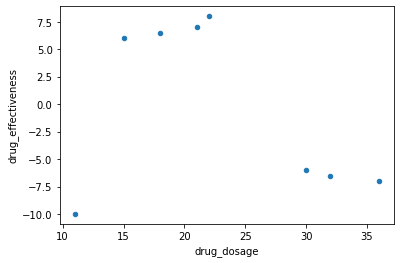

In [3]:
df.plot.scatter(x='drug_dosage',y='drug_effectiveness')

In [4]:
x = df.drop('drug_effectiveness',axis = 1)
y = df[['drug_effectiveness']]

In [7]:
xgb = XGBoostRegressor(max_depth=5,n_estimators=40)

In [8]:
xgb.fit(x,y,learning_rate=0.1,regularization_lambda=0,gamma=0)

Estimator 1 is being trained...
Training MSE: 42.3225
Estimator 2 is being trained...
Training MSE: 34.281225
Estimator 3 is being trained...
Training MSE: 27.76779225
Estimator 4 is being trained...
Training MSE: 22.4919117225
Estimator 5 is being trained...
Training MSE: 18.218448495224997
Estimator 6 is being trained...
Training MSE: 14.75694328113225
Estimator 7 is being trained...
Training MSE: 11.953124057717122
Estimator 8 is being trained...
Training MSE: 9.68203048675087
Estimator 9 is being trained...
Training MSE: 7.842444694268203
Estimator 10 is being trained...
Training MSE: 6.352380202357246
Estimator 11 is being trained...
Training MSE: 5.145427963909369
Estimator 12 is being trained...
Training MSE: 4.167796650766588
Estimator 13 is being trained...
Training MSE: 3.3759152871209372
Estimator 14 is being trained...
Training MSE: 2.734491382567959
Estimator 15 is being trained...
Training MSE: 2.2149380198800466
Estimator 16 is being trained...
Training MSE: 1.7940997961

In [9]:
# define arbitrary test observations
test_x = pd.DataFrame({'drug_dosage' : [5,20,50]})
test_x['drug_effectiveness'] = xgb.predict(test_x)

In [10]:
test_x

,drug_dosage,drug_effectiveness
0,5,-9.855886
1,20,6.892839
2,50,-6.900229


<AxesSubplot:xlabel='drug_dosage', ylabel='drug_effectiveness'>

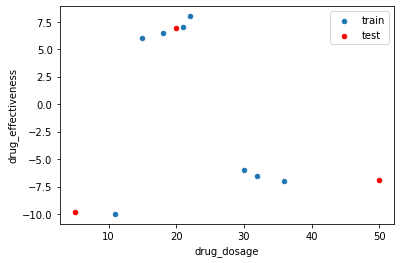

In [11]:
ax = df.plot.scatter(x='drug_dosage',y='drug_effectiveness',label='train')
test_x.plot.scatter(x='drug_dosage',y='drug_effectiveness',c='red',label='test',ax=ax)

<h3> More Complex Dataset </h3>

We can test the model on more complex dataset.

In [12]:
data = fetch_california_housing()

x = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.DataFrame(data.target,columns=data.target_names)

In [13]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
print(f"Number of records: {x.shape[0]}")

Number of records: 20640


It may be to good idea to sample 100 records from the dataset to save some time, since the algorithm is not optimized in terms of execution time. Also, the aim is not to implement the most effective algorithm rather than understanding it.

In [15]:
x = x.sample(100)
y = y.iloc[x.index,:]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
xgb = XGBoostRegressor(max_depth=15,n_estimators=20)

In [18]:
%%time
xgb.fit(x_train,y_train,learning_rate=0.1,regularization_lambda=0,gamma=0)

Estimator 1 is being trained...
Training MSE: 1.18506349004616
Estimator 2 is being trained...
Training MSE: 0.9599014269373896
Estimator 3 is being trained...
Training MSE: 0.7775201558192856
Estimator 4 is being trained...
Training MSE: 0.6297913262136212
Estimator 5 is being trained...
Training MSE: 0.5101309742330333
Estimator 6 is being trained...
Training MSE: 0.41320608912875684
Estimator 7 is being trained...
Training MSE: 0.3346969321942931
Estimator 8 is being trained...
Training MSE: 0.2711045150773773
Estimator 9 is being trained...
Training MSE: 0.21959465721267563
Estimator 10 is being trained...
Training MSE: 0.17787167234226728
Estimator 11 is being trained...
Training MSE: 0.14407605459723646
Estimator 12 is being trained...
Training MSE: 0.11670160422376157
Estimator 13 is being trained...
Training MSE: 0.09452829942124688
Estimator 14 is being trained...
Training MSE: 0.07656792253120996
Estimator 15 is being trained...
Training MSE: 0.06202001725028006
Estimator 16 

In [31]:
%%time
train_preds = xgb.predict(x_train)
test_preds = xgb.predict(x_test)

CPU times: total: 2.09 s
Wall time: 2.09 s


In [32]:
train_mse = mean_squared_error(train_preds,y_train)
test_mse = mean_squared_error(test_preds,y_test)

print("Train MSE:",train_mse)
print("Test MSE:",test_mse)

Train MSE: 0.021625042869802734
Test MSE: 0.5260264134643382


It looks like our model overfits the dataset. We can tune the regularization_lambda and gamma hyperparameters to prevent overfitting. In addition to those 2 paramaters, we can tune a lot of parameters like n_estimators, max_depth, min_sample on the leaf etc.

In [27]:
xgb_regularized = XGBoostRegressor(max_depth=6,n_estimators=20)

In [28]:
%%time
# we can increase the regularization_lambda and decrease the learning_rate
xgb_regularized.fit(x_train,y_train,learning_rate=0.1,regularization_lambda=5,gamma=10)

Estimator 1 is being trained...
Training MSE: 1.3385363028461086
Estimator 2 is being trained...
Training MSE: 1.2351591034542702
Estimator 3 is being trained...
Training MSE: 1.145813348257266
Estimator 4 is being trained...
Training MSE: 1.0687399574392167
Estimator 5 is being trained...
Training MSE: 1.0011907860912497
Estimator 6 is being trained...
Training MSE: 0.9437661032345004
Estimator 7 is being trained...
Training MSE: 0.8926416934008845
Estimator 8 is being trained...
Training MSE: 0.8487594571133528
Estimator 9 is being trained...
Training MSE: 0.809822467223667
Estimator 10 is being trained...
Training MSE: 0.7760220031117098
Estimator 11 is being trained...
Training MSE: 0.7459109709537793
Estimator 12 is being trained...
Training MSE: 0.7189781771256103
Estimator 13 is being trained...
Training MSE: 0.7189454075756754
Estimator 14 is being trained...
Training MSE: 0.7189185161346285
Estimator 15 is being trained...
Training MSE: 0.7188964484039755
Estimator 16 is being

In [29]:
%%time
train_preds = xgb_regularized.predict(x_train)
test_preds = xgb_regularized.predict(x_test)

CPU times: total: 1.89 s
Wall time: 1.86 s


In [30]:
train_mse = mean_squared_error(train_preds,y_train)
test_mse = mean_squared_error(test_preds,y_test)

print("Train MSE:",train_mse)
print("Test MSE:",test_mse)

Train MSE: 0.718833062886682
Test MSE: 0.8543719404262594


It looks like overfitting reduced, but now the model underfits the data. By tuning the hyperparameters more, we can train more stable model.